# MNIST Dataset: Image Classification with a Feedforward Neural Network
**Date:** February 4, 2025  
**Author:** Dario Piga  

In this notebook, we will implement a **feedforward neural network (FNN)** using PyTorch to classify images from the **MNIST** dataset. MNIST consists of **70,000 grayscale images** of handwritten digits (0-9), with **60,000** images used for training and **10,000** for testing.

## The MNIST Dataset

The MNIST dataset contains images of **handwritten digits**, categorized into the following **10 classes**:
- **0**
- **1**
- **2**
- **3**
- **4**
- **5**
- **6**
- **7**
- **8**
- **9**

Each image is a **28×28 grayscale image**.

## Implementation Steps

1. **Load the MNIST dataset** using PyTorch's `torchvision.datasets`
2. **Preprocess the images** (convert to tensors, normalize pixel values)
3. **Define a feedforward neural network** with fully connected layers
4. **Train the model** using **cross-entropy loss** and the **Adam optimizer**
5. **Evaluate the model** on the test dataset
6. **Visualize some predictions**


In [1]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define transformations: Convert to Tensor and Normalize
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load entire dataset as tensors
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract images and labels
X_train = torch.stack([trainset[i][0] for i in range(len(trainset))])  # Shape: [60000, 1, 28, 28]
y_train = torch.tensor([trainset[i][1] for i in range(len(trainset))])  # Shape: [60000]

X_test = torch.stack([testset[i][0] for i in range(len(testset))])  # Shape: [10000, 1, 28, 28]
y_test = torch.tensor([testset[i][1] for i in range(len(testset))])  # Shape: [10000]

# Print dataset shapes
print(f"Training set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set: X_test {X_test.shape}, y_test {y_test.shape}")


Training set: X_train torch.Size([60000, 1, 28, 28]), y_train torch.Size([60000])
Test set: X_test torch.Size([10000, 1, 28, 28]), y_test torch.Size([10000])


In [3]:
# show some images (TBD)
...

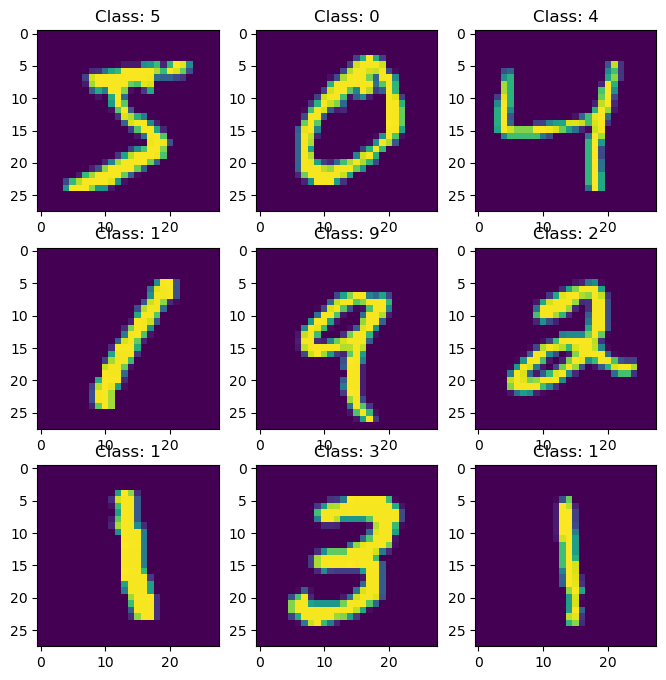

In [4]:
# show some images


plt.figure(figsize = (8, 8))

for i in range(9):
    img = X_train[i,:].numpy().squeeze()  # Convert PyTorch tensor to NumPy
    #img = np.transpose(img, (1, 2, 0))  # Change shape from (C, H, W) to (H, W, C)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"Class: {y_train[i]}")


In [5]:
# Define your FeedForward Network (TBD)
...


In [6]:
# Define your FeedForward Network (TBD)

import torch.nn.functional as F

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim=32*32*3, hidden1=512, hidden2=256, num_classes=10):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_classes)
        

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        z = self.fc3(x)
        return z


model = FeedforwardNN(input_dim = X_train.shape[1]*X_train.shape[2]*X_train.shape[3], hidden1=254, hidden2=64, num_classes=10)

print(f"Model structure: {model}")

for name, params in model.named_parameters():
    print(f"parameter name: {name}. Value {params.data}")

# check what model provides:
y_hat = model(X_train)
y_hat.shape


Model structure: FeedforwardNN(
  (fc1): Linear(in_features=784, out_features=254, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=254, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
parameter name: fc1.weight. Value tensor([[-0.0319, -0.0004,  0.0259,  ...,  0.0189,  0.0347,  0.0101],
        [-0.0049,  0.0145,  0.0005,  ..., -0.0005, -0.0158,  0.0076],
        [ 0.0168,  0.0041, -0.0021,  ..., -0.0312, -0.0255, -0.0252],
        ...,
        [-0.0228,  0.0219, -0.0041,  ..., -0.0075, -0.0337, -0.0192],
        [-0.0201, -0.0226,  0.0331,  ..., -0.0086,  0.0014, -0.0171],
        [ 0.0054, -0.0083,  0.0323,  ..., -0.0080, -0.0051,  0.0033]])
parameter name: fc1.bias. Value tensor([-1.2199e-02, -9.0111e-03, -2.7833e-02, -3.2431e-02, -3.1991e-02,
        -2.2709e-02,  1.4521e-02,  1.4434e-02,  2.8803e-02, -1.0588e-02,
        -9.9515e-03,  1.6043e-02,  1.0936e-02, -1.0922e-02, -2.0929e-02,
        -1.2837e-02, -2.0722

torch.Size([60000, 10])

In [7]:
# Define the loss function 
criterion = nn.CrossEntropyLoss()  # Multi-class classification loss

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [8]:
# Training loop (TBD)
...

In [9]:
# Training loop with accuracy calculation
max_epochs = 8000
for it in range(max_epochs):
    optimizer.zero_grad()
    i = np.random.randint(0, X_train.shape[0], size = 1024) # mini-batch implementation
    z_hat = model(X_train[i,:])  # Logit Predictions  
    loss = criterion(z_hat, y_train[i])  # Compute loss
    loss.backward()
    optimizer.step()

    if it % 5 == 0:  # Print every 5 iterations
        with torch.no_grad():
            z_hat = model(X_train)
            predicted_labels = torch.argmax(z_hat, dim=1)  # Get predicted class
            accuracy = (predicted_labels == y_train).float().mean().item()  # Compute accuracy
        
        print(f"Iteration: {it}. Loss: {loss.item():.3f}, Accuracy: {accuracy:.2%}")

    

Iteration: 0. Loss: 2.306, Accuracy: 9.74%
Iteration: 5. Loss: 2.304, Accuracy: 9.74%
Iteration: 10. Loss: 2.302, Accuracy: 9.74%
Iteration: 15. Loss: 2.300, Accuracy: 9.74%
Iteration: 20. Loss: 2.300, Accuracy: 9.75%
Iteration: 25. Loss: 2.298, Accuracy: 9.76%
Iteration: 30. Loss: 2.297, Accuracy: 9.81%
Iteration: 35. Loss: 2.294, Accuracy: 9.92%
Iteration: 40. Loss: 2.295, Accuracy: 10.11%
Iteration: 45. Loss: 2.292, Accuracy: 10.46%
Iteration: 50. Loss: 2.293, Accuracy: 10.98%
Iteration: 55. Loss: 2.293, Accuracy: 11.43%
Iteration: 60. Loss: 2.287, Accuracy: 12.00%
Iteration: 65. Loss: 2.285, Accuracy: 12.93%
Iteration: 70. Loss: 2.285, Accuracy: 13.83%
Iteration: 75. Loss: 2.279, Accuracy: 14.82%
Iteration: 80. Loss: 2.281, Accuracy: 15.81%
Iteration: 85. Loss: 2.277, Accuracy: 16.71%
Iteration: 90. Loss: 2.276, Accuracy: 17.80%
Iteration: 95. Loss: 2.274, Accuracy: 18.60%
Iteration: 100. Loss: 2.273, Accuracy: 19.33%
Iteration: 105. Loss: 2.271, Accuracy: 20.31%
Iteration: 110. Lo

KeyboardInterrupt: 

In [ ]:
# assess model performance (TBD)
...

In [ ]:
import matplotlib.pyplot as plt

def assess_results(model, X, y, data_type):
    with torch.no_grad():
        z_hat = model(X).squeeze()  # Precit logit z (variables used entering the softmax function)
        predicted_labels = torch.argmax(z_hat, dim=1)  # Get predicted class
        
        # Compute accuracy
        accuracy = (predicted_labels == y).float().mean().item()  # Compute accuracy

        plt.figure(figsize = (12,12))
        rand_values = np.random.randint(0, X.shape[0], size = 9)
        for count, i in enumerate(rand_values):
            plt.subplot(3,3,count+1)
            plt.imshow(X[i,:].numpy().squeeze())
            plt.title(f"{data_type}. Predicted class: {predicted_labels[i]}. True: {y[i]}")


        # Print confusion matrix results
        print(f"Accuracy: {accuracy*100:.3f} % ")


In [ ]:
# Assess results in training
print('Training results')

assess_results(model, X_train, y_train, data_type = 'train')
#print(f"rmse = {rmse}. R2 = {R2:.3f}")


# Assess results in test
print('Test results')

assess_results(model, X_test, y_test, data_type = 'test')
#print(f"rmse = {rmse}. R2 = {R2:.3f}")
